Importar bibliotecas e dataset: 
https://www.kaggle.com/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv

In [1]:
# importanto as bibliotecas
import pandas as pd
import requests
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
# importar para dataframe o csv
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv',parse_dates=['Date'], dayfirst=True,)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# removendo colunas desnecessárias
df.drop(['cogs','gross margin percentage','gross income','Rating'], axis = 1, inplace=True)

In [12]:
# alterar nome de colunas
df = df.rename(columns = {'Invoice ID ':'ID', 
                          'Branch': 'Unidade', 
                          'City': 'Cidade',
                          'Customer type': 'TipoCliente', 
                          'Gender': 'Genero', 
                          'Product line': 'TipoProduto',
                          'Unit price ': 'PrecoUnit', 
                          'Quantity': 'Qtde',
                          'Tax 5%': 'Taxa', 
                          'Total': 'Total',
                          'Date': 'Data',
                          'Time': 'Hora',
                          'Payment': 'FormaPgto'})

In [13]:
# verificando nulos
df.isnull().sum()

Invoice ID     0
Unidade        0
Cidade         0
TipoCliente    0
Genero         0
TipoProduto    0
Unit price     0
Qtde           0
Taxa           0
Total          0
Data           0
Hora           0
FormaPgto      0
dtype: int64

In [14]:
# conferindo os tipos de dados
df.dtypes

Invoice ID             object
Unidade                object
Cidade                 object
TipoCliente            object
Genero                 object
TipoProduto            object
Unit price            float64
Qtde                    int64
Taxa                  float64
Total                 float64
Data           datetime64[ns]
Hora                   object
FormaPgto              object
dtype: object

In [15]:
# criando uma coluna com a hora em formato integer
df['Horas'] = pd.to_numeric(df['Hora'].str[:2])
df.head(1)

,Invoice ID,Unidade,Cidade,TipoCliente,Genero,TipoProduto,Unit price,Qtde,Taxa,Total,Data,Hora,FormaPgto,Horas
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,13


In [16]:
df.groupby('Horas').sum()

,Unit price,Qtde,Taxa,Total
Horas,,,,
10,5820.38,525,1496.2610,31421.4810
11,5112.64,513,1446.5395,30377.3295
12,4475.95,501,1241.2325,26065.8825
13,5599.27,585,1653.4870,34723.2270
14,4765.65,495,1468.0190,30828.3990
15,5481.48,530,1484.7385,31179.5085
16,4646.75,420,1201.2535,25226.3235
17,4204.53,415,1164.0580,24445.2180
18,4823.38,475,1239.5400,26030.3400


In [40]:
# alterar formato numeros fltuantes
pd.options.display.float_format = '{:20,.2f}'.format

In [41]:
df.groupby('Horas').count()

,Invoice ID,Unidade,Cidade,TipoCliente,Genero,TipoProduto,Unit price,Qtde,Taxa,Total,Data,Hora,FormaPgto
Horas,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93


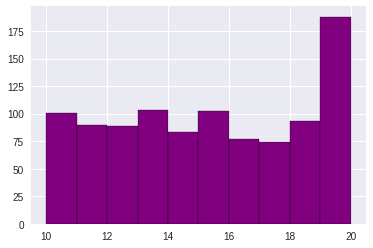

In [63]:
# Frequencia de compras por faixa de horas:
plt.hist(df['Horas'], color='purple', edgecolor='black');

Genero
Female             167,882.93
Male               155,083.82
Name: Total, dtype: float64


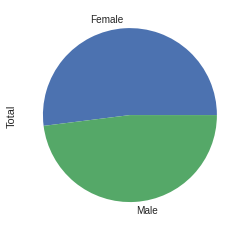

In [43]:
# genero que mais compra por valor total de compras
print(df.groupby(df['Genero'])['Total'].sum())
df.groupby(df['Genero'])['Total'].sum().plot.pie();

TipoProduto
Food and beverages                  56,144.84
Sports and travel                   55,122.83
Electronic accessories              54,337.53
Fashion accessories                 54,305.89
Home and lifestyle                  53,861.91
Health and beauty                   49,193.74
Name: Total, dtype: float64


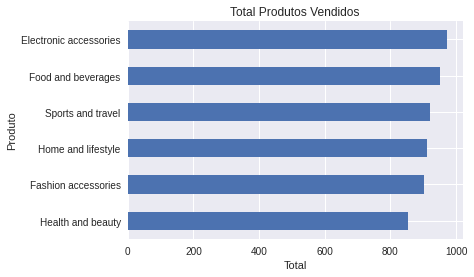

In [47]:
# Tipos de produtos que mais venderam (quantidade)
print(df.groupby(df['TipoProduto'])['Total'].sum().sort_values(ascending=False))
df.groupby(df['TipoProduto'])['Qtde'].sum().sort_values(ascending=True).plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

Unidade
C             110,568.71
A             106,200.37
B             106,197.67
Name: Total, dtype: float64


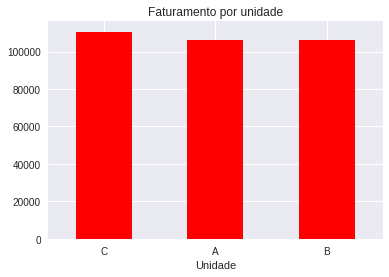

In [49]:
# unidade com maior faturamento no periodo
print(df.groupby(df['Unidade'])['Total'].sum().sort_values(ascending=False))
df.groupby('Unidade')['Total'].sum().sort_values(ascending=False ).plot.bar(title='Faturamento por unidade', color='red')
plt.xticks(rotation='horizontal');